#### Aprendizaje de Máquina - Ejercicios Clase Teoría

### Ejemplo simple (clasificación de sentimiento
- NLP = IA aplicada al lenguaje humano.
- Representa palabras/oraciones como vectores en espacios de alta dimensión.
- Se aplica en traducción, chatbots, resumen, análisis de sentimiento, búsqueda semántica.
- Los Transformers revolucionaron NLP → base de los LLM como ChatGPT.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Dataset simple
docs = ["Me encanta este producto", 
        "Es terrible, no lo recomiendo", 
        "Muy bueno y útil", 
        "Una pérdida de dinero"]

labels = [1, 0, 1, 0]  # 1=positivo, 0=negativo

# Representación TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Entrenamos un clasificador
clf = LogisticRegression()
clf.fit(X, labels)

# Probamos
test = ["este producto es muy bueno"]
print(clf.predict(vectorizer.transform(test)))  # → [1]


[1]


Ejemplo:
- Genera datos sintéticos para un problema de regresión lineal.
- Ajusta un modelo lineal usando mínimos cuadrados (descenso del gradiente simple).
- Grafica los datos originales y la recta ajustada.
- Muestra la evolución de la función de pérdida (error promedio) en cada iteración.
- Simula datos con ruido (una línea más o menos con pendiente 3 e intercepto 4).
- Usa descenso de gradiente para ajustar los parámetros θ=[intercepto,pendiente]
- Muestra cómo el error promedio (función de pérdida) va disminuyendo iteración a iteración.

Parámetros aprendidos: intercepto=3.89, pendiente=2.93


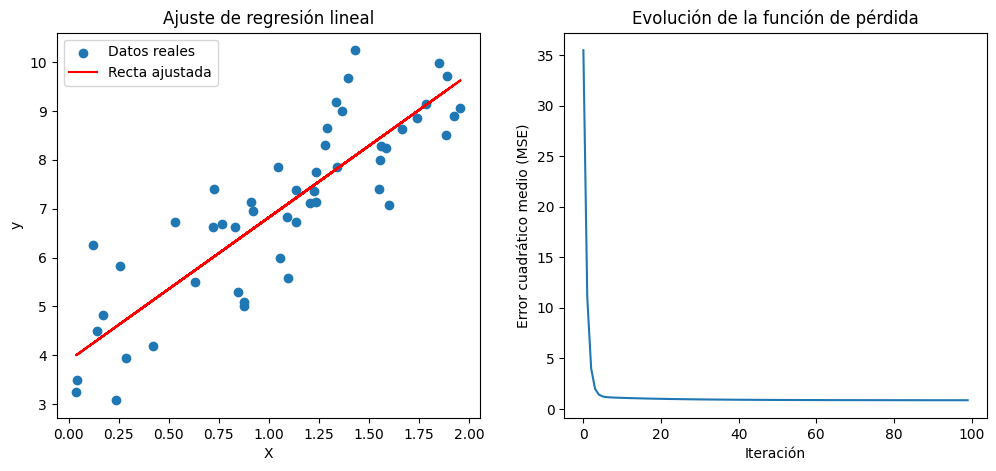

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos (lineal)
np.random.seed(0)
N = 50
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X[:,0] + np.random.randn(N)  # y = 4 + 3x + ruido

# Inicializar parámetro theta = [intercepto, pendiente]
theta = np.random.randn(2)

# Agregar columna de 1s para el intercepto
X_b = np.c_[np.ones((N, 1)), X]

# Función para calcular la predicción
def predict(X, theta):
    return X.dot(theta)

# Función de pérdida (MSE)
def loss(y, y_pred):
    return np.mean((y - y_pred)**2)

# Descenso de gradiente
learning_rate = 0.1
n_iterations = 100
loss_history = []

for i in range(n_iterations):
    y_pred = predict(X_b, theta)
    error = y_pred - y
    gradients = 2/N * X_b.T.dot(error)
    theta = theta - learning_rate * gradients
    current_loss = loss(y, y_pred)
    loss_history.append(current_loss)

# Resultados
print(f"Parámetros aprendidos: intercepto={theta[0]:.2f}, pendiente={theta[1]:.2f}")

# Graficar datos y recta ajustada
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X, y, label="Datos reales")
plt.plot(X, predict(X_b, theta), color='red', label="Recta ajustada")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ajuste de regresión lineal")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iterations), loss_history)
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Evolución de la función de pérdida")

plt.show()


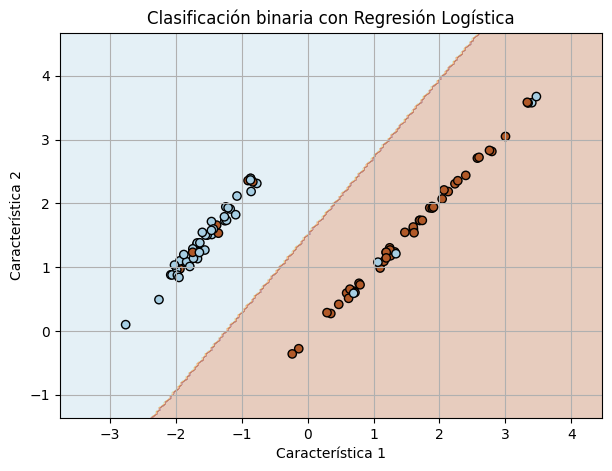

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. Generar datos sintéticos de clasificación binaria (2 clases, 2 características)
X, y = make_classification(
    n_samples=100,      # número de puntos
    n_features=2,       # dos variables para graficar
    n_informative=2,    # ambas variables son relevantes
    n_redundant=0,      # no hay variables redundantes
    n_clusters_per_class=1,
    flip_y=0.1,         # ruido en las etiquetas
    class_sep=1.5,      # separación entre clases
    random_state=42
)

# 2. Entrenar un modelo de regresión logística
clf = LogisticRegression()
clf.fit(X, y)

# 3. Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# 4. Predecir las clases para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Graficar
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  # frontera
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)  # puntos
plt.title("Clasificación binaria con Regresión Logística")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()


In [6]:
!python -m pip list

Package       Version
------------- -------
joblib        1.5.1
numpy         2.2.6
pip           22.0.2
scikit-learn  1.7.1
scipy         1.15.3
setuptools    59.6.0
threadpoolctl 3.6.0


In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: 
Location: /home/javier/Documents/GitRepo/UCA/IA/venv/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [1]:
import sys
print(sys.executable)

/home/javier/Documents/GitRepo/UCA/IA/venv/bin/python
/home/javier/Documents/GitRepo/UCA/IA/venv/bin/python


#### Simular el siguiente escenario:
En un invernadero el objetivo principal es mantener las condiciones óptimas para el cultivo, y el consumo energético es una variable derivada.Ejemplo en Python

Simularemos:
- Temperaturas medidas por el sensor.
- Temperatura ideal para el cultivo (p. ej. 22°C).
- Potencia necesaria para llegar a ese valor.
- Un modelo que aprenda esa relación.

Modelo aprendido: Potencia = 12.01 + -0.05 * Temperatura
Error MSE: 38.4825


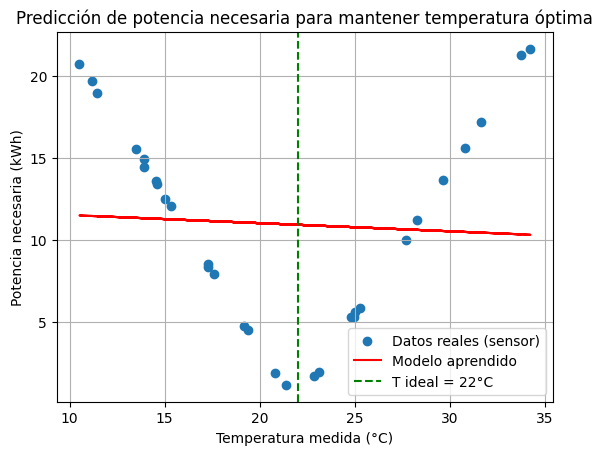

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Parámetros del invernadero
T_ideal = 22
k = 1.8  # factor de consumo por grado de diferencia

# Simulación de temperaturas medidas (°C)
np.random.seed(42)
N = 30
T_medida = np.random.uniform(10, 35, N)

# Potencia necesaria real (kWh)
P_real = k * np.abs(T_ideal - T_medida) + np.random.randn(N) * 0.2

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(T_medida.reshape(-1, 1), P_real)

# Predicciones
P_pred = modelo.predict(T_medida.reshape(-1, 1))

# Pérdida
mse = mean_squared_error(P_real, P_pred)

print(f"Modelo aprendido: Potencia = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f} * Temperatura")
print(f"Error MSE: {mse:.4f}")

# Gráfico
plt.scatter(T_medida, P_real, label="Datos reales (sensor)")
plt.plot(T_medida, P_pred, color='red', label="Modelo aprendido")
plt.axvline(T_ideal, color='green', linestyle='--', label=f"T ideal = {T_ideal}°C")
plt.xlabel("Temperatura medida (°C)")
plt.ylabel("Potencia necesaria (kWh)")
plt.title("Predicción de potencia necesaria para mantener temperatura óptima")
plt.legend()
plt.grid(True)
plt.show()


Calculo manualmente los parámetros θ0​ y θ1​ de la regresión lineal usando la fórmula de mínimos cuadrados

In [1]:
import numpy as np

# Simulación de datos (ya deberían estar generados: T y P)
# Si no los tenés, podés generar con este ejemplo:
np.random.seed(0)
N = 30
T = np.random.uniform(10, 35, N)  # Temperatura medida
theta_0_real = 1.5
theta_1_real = 2.2
ruido = np.random.normal(0, 1.5, N)
P = theta_0_real + theta_1_real * T + ruido  # Potencia real

# Cálculo manual de los parámetros
T_mean = np.mean(T)
P_mean = np.mean(P)

# Fórmulas de mínimos cuadrados
numerador = np.sum((T - T_mean) * (P - P_mean))
denominador = np.sum((T - T_mean) ** 2)

theta_1_manual = numerador / denominador
theta_0_manual = P_mean - theta_1_manual * T_mean

# Mostrar resultados
print(f"theta_0 (intercepto): {theta_0_manual:.4f}")
print(f"theta_1 (pendiente): {theta_1_manual:.4f}")


theta_0 (intercepto): 1.7154
theta_1 (pendiente): 2.1852


- Simula datos realistas de sensores (temperatura y consumo).
- Calcula manualmente θ0​ y θ1​ sin usar LinearRegression.
- Grafica los datos y la recta de regresión calculada a mano.
- Los puntos azules son los datos reales.
- La línea roja es el resultado del modelo ajustado usando solo las fórmulas clásicas, sin librerías automáticas de machine learning.

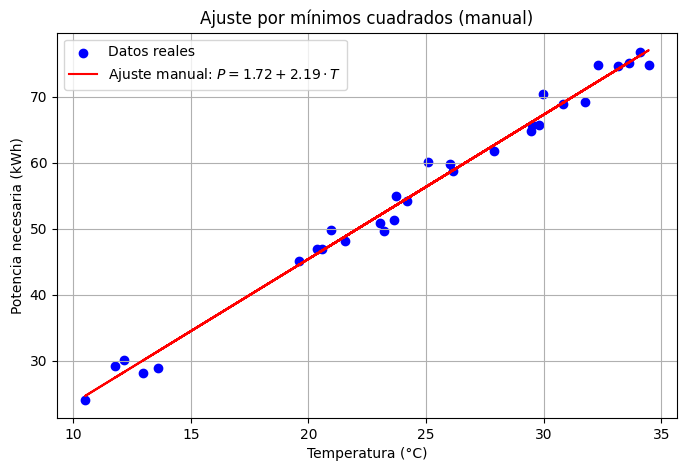

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simular datos
np.random.seed(0)
N = 30
T = np.random.uniform(10, 35, N)  # Temperaturas simuladas
theta_0_real = 1.5
theta_1_real = 2.2
ruido = np.random.normal(0, 1.5, N)
P = theta_0_real + theta_1_real * T + ruido  # Potencia real con ruido

# Cálculo manual de parámetros por mínimos cuadrados
T_mean = np.mean(T)
P_mean = np.mean(P)

# Pendiente (theta_1)
numerador = np.sum((T - T_mean) * (P - P_mean))
denominador = np.sum((T - T_mean) ** 2)
theta_1 = numerador / denominador

# Intercepto (theta_0)
theta_0 = P_mean - theta_1 * T_mean

# Predicción usando el modelo ajustado manualmente
P_pred = theta_0 + theta_1 * T

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(T, P, label="Datos reales", color="blue")
plt.plot(T, P_pred, color="red", label=fr"Ajuste manual: $P = {theta_0:.2f} + {theta_1:.2f} \cdot T$")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Potencia necesaria (kWh)")
plt.title("Ajuste por mínimos cuadrados (manual)")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
%pip install pillow

  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
Note: you may need to restart the kernel to use updated packages.


%pip install torch
%pip install torchvision

In [13]:
from PIL import Image
import torchvision.transforms as T

preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),  # pasa a float32 y escala a [0,1], salida: C×H×W
    T.Normalize(mean=[0.485,0.456,0.406],
                std=[0.229,0.224,0.225])
])

img = Image.open("gato_sintetico.jpg").convert("RGB")
x = preprocess(img)          # shape: [3, 224, 224]
x = x.unsqueeze(0)           # batch: [1, 3, 224, 224]


In [7]:
import os
print(os.getcwd())


/home/javier/Documents/GitRepo/UCA/IA/TP


In [10]:
from PIL import Image
import numpy as np

# Abrir la imagen generada
img = Image.open("gato_sintetico.png").convert("RGB")

print(img.size)   # (224, 224)
arr = np.asarray(img)
print(arr.shape)  # (224, 224, 3)


(256, 256)
(256, 256, 3)


In [11]:
img = Image.open("gato_sintetico.png")
img.save("gato_sintetico.jpg", "JPEG")


#### Preparación  para preprocesamiento en modelos pre-entrenados en ImageNet (ResNet, VGG, EfficientNet)
- resize → crop → normalizar → tensor CHW 
- Resize con lado corto=256, manteniendo aspecto.
- CenterCrop a 224×224.
- Canales R, G, B mostrados como láminas en color (dejando un canal y poniendo los otros en 0).
- Tensor normalizado (CHW 3×224×224, float32) usando ImageNet mean/std
- mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225].
- Muestras de píxeles HWC (uint8) y sus valores normalizados.

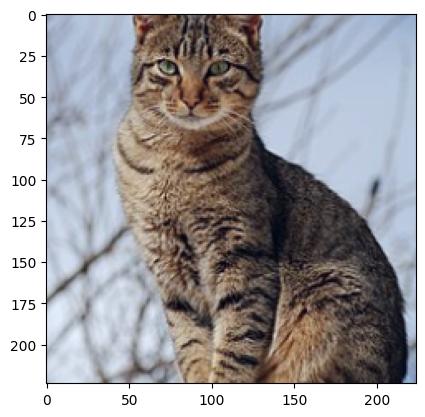

In [3]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.load("cat_imagenet_chw_norm.npy")

# Volvemos a HWC para visualizar
arr_hwc = arr.transpose(1,2,0)

plt.imshow((arr_hwc - arr_hwc.min()) / (arr_hwc.max()-arr_hwc.min()))
plt.show()


In [4]:
import numpy as np

# Cargar el tensor normalizado (CHW 3×224×224)
tensor = np.load("cat_imagenet_chw_norm.npy")

print(tensor.shape)   # (3, 224, 224)
print(tensor.dtype)   # float32

# Ver algunos valores
print(tensor[:, 100, 100])  # R,G,B normalizados en la posición (100,100)


(3, 224, 224)
float32
[-0.06293353 -0.512605   -0.7586928 ]


#### Primeras 8 filas y columnas del tensor

In [5]:
import numpy as np

# Cargar el tensor (CHW: 3×224×224)
tensor = np.load("cat_imagenet_chw_norm.npy")

print("Shape:", tensor.shape)   # (3, 224, 224)

# Extraer primeras 8 filas y columnas
subtensor = tensor[:, :8, :8]

# Mostrar cada canal
canales = ["R (rojo)", "G (verde)", "B (azul)"]
for i, nombre in enumerate(canales):
    print(f"\nCanal {nombre}:")
    print(np.round(subtensor[i], 4))  # redondeamos para legibilidad


Shape: (3, 224, 224)

Canal R (rojo):
[[0.2967 0.5022 0.6221 0.7762 0.8961 0.9988 1.0502 1.0673]
 [0.3994 0.5878 0.7077 0.8276 0.9474 1.0331 1.1015 1.1187]
 [0.5022 0.6049 0.7248 0.8447 0.9474 1.0331 1.1187 1.1529]
 [0.5707 0.6221 0.7591 0.8789 0.9817 1.0673 1.1358 1.17  ]
 [0.6734 0.7248 0.8618 0.9817 1.0673 1.1358 1.17   1.1529]
 [0.7933 0.8789 0.9988 1.1015 1.1529 1.1529 1.1529 1.1015]
 [0.8789 0.9988 1.1015 1.17   1.1529 1.1187 1.0844 1.0502]
 [0.9303 1.0673 1.1529 1.1529 1.0673 1.0331 1.0331 1.0502]]

Canal G (verde):
[[0.4153 0.6954 0.8529 0.993  1.1155 1.2031 1.2731 1.3081]
 [0.5378 0.8004 0.923  1.0455 1.1506 1.2381 1.3081 1.3256]
 [0.6604 0.8704 0.9755 1.098  1.2031 1.2731 1.3431 1.3606]
 [0.7304 0.888  1.028  1.1331 1.2381 1.3256 1.3782 1.3782]
 [0.8354 0.993  1.1506 1.2556 1.3431 1.3957 1.3957 1.3606]
 [0.958  1.1506 1.2906 1.3957 1.4132 1.4132 1.3782 1.3081]
 [1.0805 1.2731 1.3782 1.4307 1.3957 1.3606 1.3081 1.2556]
 [1.1506 1.3081 1.3957 1.3782 1.2906 1.2556 1.2556 1.2731]

#### Visualizar con matplotlib estas sub-matrices como imágenes de 8×8 en colores?
- Imagen 8×8 con los 3 canales combinados.
- Tres imágenes 8×8 separadas: R en rojo, G en verde y B en azul.

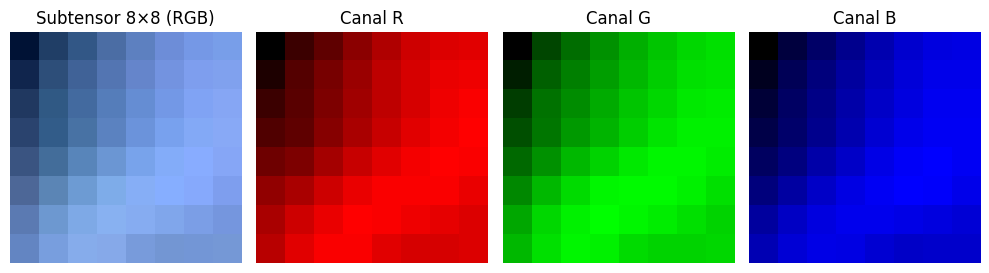

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el tensor normalizado (CHW: 3×224×224)
tensor = np.load("cat_imagenet_chw_norm.npy")

# Extraer primeras 8 filas y columnas
subtensor = tensor[:, :8, :8]  # (3,8,8)

# Volver a HWC (8x8x3) para mostrar como imagen
subtensor_hwc = subtensor.transpose(1, 2, 0)

# Normalizar valores al rango [0,1] para visualización
vis = (subtensor_hwc - subtensor_hwc.min()) / (subtensor_hwc.max() - subtensor_hwc.min())

# Mostrar
plt.figure(figsize=(10,3))

# Imagen completa (8x8 con los 3 canales)
plt.subplot(1,4,1)
plt.imshow(vis)
plt.title("Subtensor 8×8 (RGB)")
plt.axis("off")

# Canales por separado en color
colores = ["R", "G", "B"]
for i, c in enumerate(colores, start=2):
    ch = np.zeros_like(vis)
    ch[:,:,i-2] = (subtensor[i-2] - subtensor[i-2].min()) / (subtensor[i-2].max() - subtensor[i-2].min())
    plt.subplot(1,4,i)
    plt.imshow(ch)
    plt.title(f"Canal {c}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Shape: (224, 224, 3)
Dtype: uint8


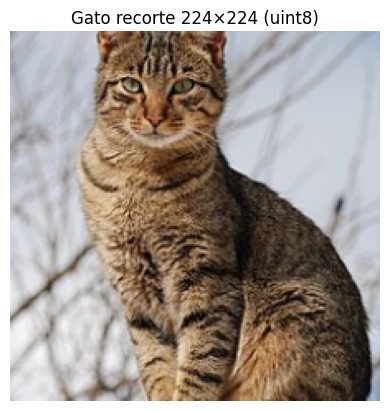

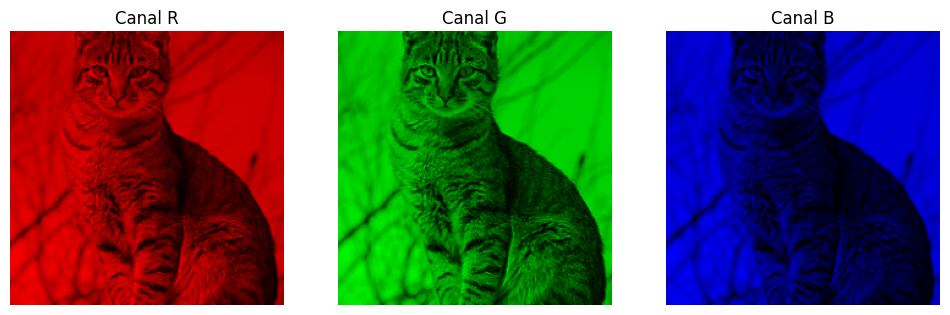

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen (HWC: 224×224×3, dtype=uint8)
img = np.load("cat_hwc_uint8.npy")

print("Shape:", img.shape)   # (224, 224, 3)
print("Dtype:", img.dtype)   # uint8

# Mostrar la imagen completa
plt.imshow(img)
plt.title("Gato recorte 224×224 (uint8)")
plt.axis("off")
plt.show()

# Mostrar los tres canales por separado en color
R = np.stack([img[:,:,0], np.zeros_like(img[:,:,0]), np.zeros_like(img[:,:,0])], axis=-1)
G = np.stack([np.zeros_like(img[:,:,1]), img[:,:,1], np.zeros_like(img[:,:,1])], axis=-1)
B = np.stack([np.zeros_like(img[:,:,2]), np.zeros_like(img[:,:,2]), img[:,:,2]], axis=-1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R); plt.title("Canal R"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(G); plt.title("Canal G"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(B); plt.title("Canal B"); plt.axis("off")
plt.show()
